<a href="https://colab.research.google.com/github/AteneaCB/Python/blob/main/M5Sesi%C3%B3n4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Módulo 5**
Machine Learning

**Sesión 4**
Problemas de regresión

In [1]:
#Librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

**NOTA:** Ejercicios pendientes de la sesión anterior

**Reto 02**
- A continuación vas a desarrollar por tu propia cuenta una clusterización pero ahora con un dataset con el doble de dimensiones. Contarás con el apoyo de los TA y el Experto para que puedas desarrollar el reto que a continuación vas a resolver. Lee a detalle cada una de las instrucciones contenidas en cada paso. Éxito.

In [2]:
vino = pd.read_csv("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2003.%20Clusterizaci%C3%B3n/Reto%2002/wine-challenge.csv")
vino.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Color_Intensity
0,14.23,1.71,2.43,15.6,127,5.64
1,13.20,1.78,2.14,11.2,100,4.38
2,13.16,2.36,2.67,18.6,101,5.68
3,14.37,1.95,2.50,16.8,113,7.80
4,13.24,2.59,2.87,21.0,118,4.32


**Paso 1**
Genera un Análisis Exploratorio básico de las variables con las que cuentas, tratandos de responder las siguientes preguntas:
- Cuantas variables tienes y de que tipo son
- Como se distribuyen tus variables
- Cuantas observaciones tienes

In [3]:
#Tipo de datos
vino.dtypes

Alcohol            float64
Malic_Acid         float64
Ash                float64
Ash_Alcanity       float64
Magnesium            int64
Color_Intensity    float64
dtype: object

In [4]:
#Estadísticos
vino.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Color_Intensity
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,12.985253,1.958485,2.340101,18.764646,100.414141,4.253434
std,0.865526,0.887749,0.280970,3.476108,15.701950,1.598098
min,11.030000,0.890000,1.360000,10.600000,70.000000,1.280000
25%,12.290000,1.500000,2.195000,16.550000,88.000000,2.900000
50%,13.050000,1.710000,2.320000,18.000000,98.000000,4.250000
75%,13.745000,2.055000,2.505000,20.900000,108.000000,5.415000
max,14.830000,5.800000,3.230000,30.000000,162.000000,8.900000


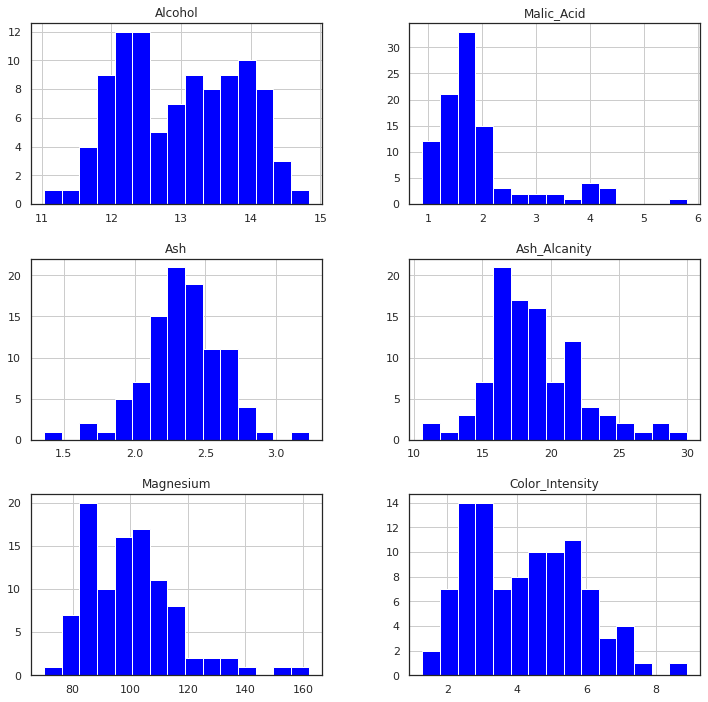

In [5]:
#Histogramas
sns.set(style='white',font_scale=1.0, rc={'figure.figsize':(12,12)})
ax=vino.hist(bins=15,color='blue' )

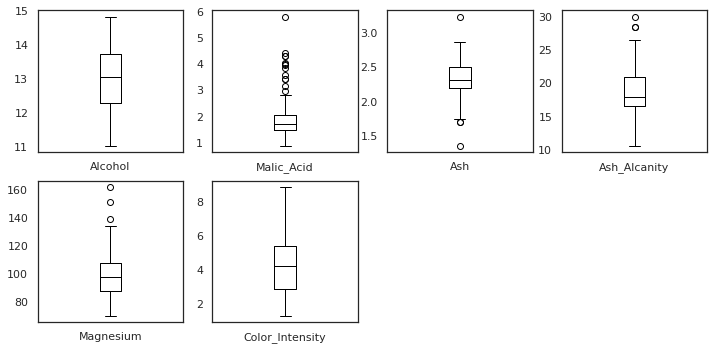

In [6]:
# Boxplots para todas las variables
vino.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

In [7]:
#Nulos
vino.isnull().sum()

Alcohol            0
Malic_Acid         0
Ash                0
Ash_Alcanity       0
Magnesium          0
Color_Intensity    0
dtype: int64

**Paso 2**
Estandarice y genere una nueva escala

- ¿Recuerda lo comentado respecto a que manejar distintas escalas puede estropear nuestra clusterización? 
- Aunque tengamos menos variables, sucede lo mismo. Genere una nueva escala y estandarice los datos.

In [8]:
#Reescalar los valores de las variables
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
vino_cluster = vino.copy()
vino_cluster[vino_cluster.columns]=std_scaler.fit_transform(vino_cluster)
vino_cluster.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Color_Intensity
count,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,3.266186e-16,-2.467162e-16,2.893308e-16,1.099009e-16,1.382172e-16,-1.917658e-16
std,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00
min,-2.270530e+00,-1.209714e+00,-3.506035e+00,-2.360743e+00,-1.946823e+00,-1.870077e+00
25%,-8.073595e-01,-5.190859e-01,-5.190579e-01,-6.403474e-01,-7.946350e-01,-8.512133e-01
50%,7.518778e-02,-2.813288e-01,-7.190569e-02,-2.210914e-01,-1.545303e-01,-2.159956e-03
75%,8.822541e-01,1.092722e-01,5.898796e-01,6.174205e-01,4.855743e-01,7.305416e-01
max,2.142206e+00,4.349274e+00,3.183362e+00,3.248613e+00,3.942139e+00,2.922357e+00


**Paso 3**

Ahora reduzca de 6 a solo 2 dimensiones
- Importe PCA de sklearn.decomposition y genere 2 nuevas dimensiones que "resuman" a las 6 originales

In [9]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(vino_cluster)

print('Varianza acumulada explicada por 2 componentes principales:  {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Varianza acumulada explicada por 2 componentes principales:  62.66%


**Paso 4**

Grafique las dos dimensiones que acaba de generar

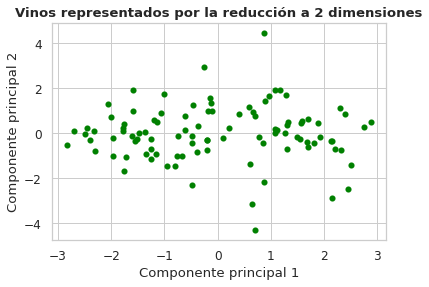

In [10]:
sns.set(style='whitegrid', rc={'figure.figsize':(6,4)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='green',lw=0.1)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Vinos representados por la reducción a 2 dimensiones',fontweight='bold')
plt.show()

**Paso 5**

Decida cuantos clusters usted necesita. Ahora, usted deberá emplear uno de los métodos que el Experto le ha enseñado:

- Método del Codo (Método de la inercia)
- Método de la Silueta

Con base en él, escriba el código pertinente y argumente su decisión de número de clusters

- CONSEJO: Le será confuso elegir con un solo método. Le recomiendo ampliamente usar dos.

In [12]:
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score
from tqdm import tqdm

In [13]:
# Método del Codo
inertia = []
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters = i,
                            init = 'k-means++',
                            n_init = 15,
                            max_iter = 500,
                            random_state = 17)
    kmeans.fit(vino_cluster)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 15.31it/s]


In [15]:
#Método de la Silueta
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(vino_cluster)
    silhouette[i] = silhouette_score(vino_cluster, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 12.32it/s]


**Paso 6**

Gráfique el método que empleó

- Junto con Matplotlib y Seaborn (si es el caso), grafique el método de decisión de Clusters que usted usó en el paso anterior

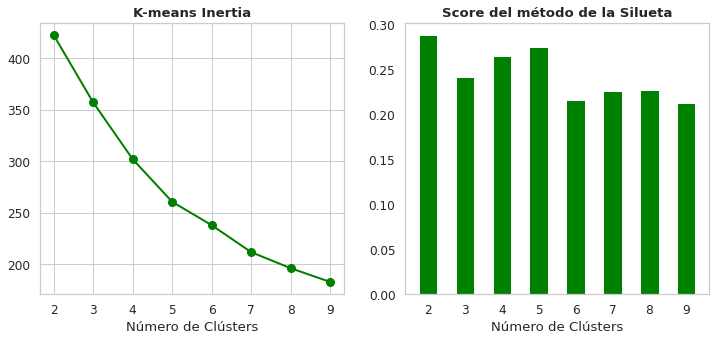

In [17]:
sns.set(style='whitegrid',font_scale=1.1, rc={'figure.figsize':(12,5)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='green')
plt.xlabel('Número de Clústers')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'green',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Score del método de la Silueta',fontweight='bold')
plt.xlabel('Número de Clústers')


plt.show()

**Paso 7**

Defina su clusterización
- Ahora, usted deberá emplear el número de clusters que decidió en el paso anterior con base en el ejemplo desarrollado por el experto.
- Recuerde definir una nueva variable donde almacenará KMeans()
Defina una segunda variable donde almacene sus centrodes, derivado de la primera (.clustercenters)

In [18]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
modelo_kmeans = kmeans.fit(vino_cluster)
centroides = modelo_kmeans.cluster_centers_

In [19]:
clusters = kmeans.fit_predict(vino_cluster)
vino_cluster["label"] = clusters

**Paso 8**

Genere un breve EDA de sus variables clusterizadas
- Puede generar histogramas o distintas visualizaciones de sus variabels clusterizadas. Paso libre

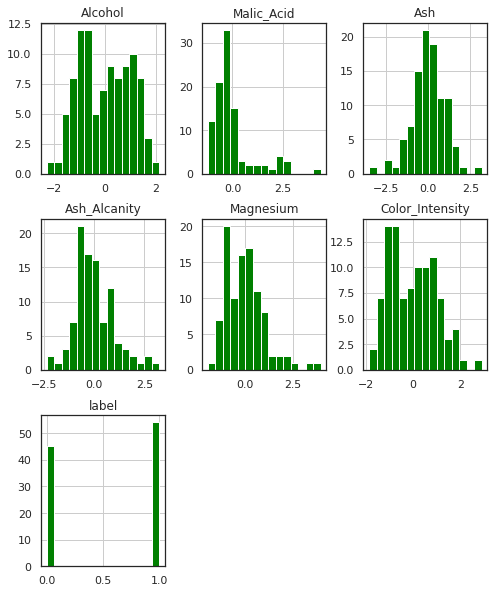

In [40]:
#Histogramas
sns.set(style='white',font_scale=1.0, rc={'figure.figsize':(8,10)})
ax=vino_cluster.hist(bins=15,color='green')

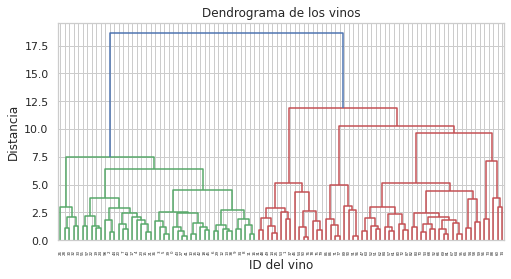

In [71]:
#EXTRA
#Dendograma
from scipy.cluster.hierarchy import dendrogram, linkage
#usar el dataset normalizada y el metodo de ward para hacer el enlace
Z = linkage(vino_cluster, "ward")
plt.figure(figsize=(8,4))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=4.)
plt.show()

**Paso 9**

Visualice los clusters en el plano cartesiano
- Genere una visualización de los clusters que usted decidió emplear dada la reducción de dimensiones y los clusters que generó

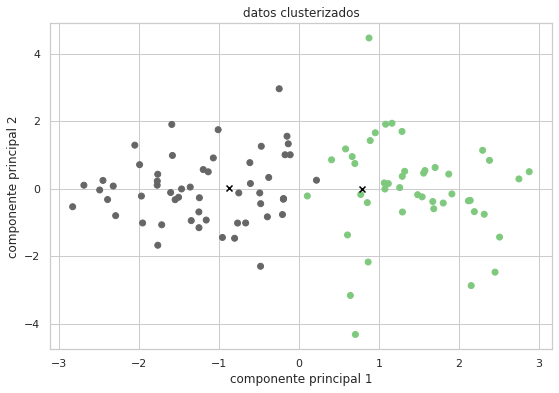

In [34]:
# Visualización
sns.set(style='whitegrid', rc = {'figure.figsize':(9,6)})

plt.scatter(x = pca_2_result[:,0], y = pca_2_result[:,1], c = vino_cluster.label, cmap ="Accent")
plt.scatter(centroides[:,0], centroides[:,1],
            marker = 'x', color = 'black')

plt.xlabel('componente principal 1')
plt.ylabel('componente principal 2')

plt.title('datos clusterizados')

plt.show()

**Ejemplo 1**
Regresión lineal

El Teorema de Gauss-Márkov es un conjunto de supuestos que debe cumplir un estimador OLS (Ordinary Least Squares ó MCO, Mínimo Cuadrados Ordinarios) para que se considere BLUE (Best Linear Unbiased Estimator ó ELIO, Estimador Lineal Insesgado Óptimo). El Teorema de Gauss-Márkov fue formulado por Carl Friederich Gauss y Andréi Márkov.

- Teorema de Gauss-Markov, supuestos:
1. Modelo lineal en los parámetros (Estimadores se comportan de forma lineal)
2. Media nula y exogeneidad estricta
3. No multicolinealidad exacta
4. Homocedasticidad
5. No autocorrelación


In [48]:
#Librerías específicas
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [49]:
data = pd.read_csv("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2004.%20Regresiones/Ejercicio03/polynomial-regression.csv")
data.head()

,numero_de_trabajadores,productividad_marginal
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [50]:
#Procesamiento
x = data.numero_de_trabajadores.values.reshape(-1,1)
y = data.productividad_marginal.values.reshape(-1,1)

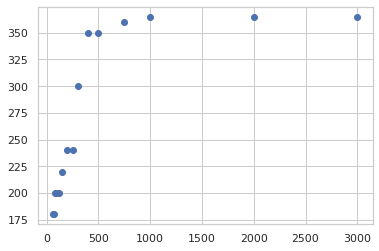

In [51]:
#Graficar
sns.set(style='whitegrid',font_scale=1.0, rc={'figure.figsize':(6,4)})
plt.scatter(x=x, y=y);

**Regresión polinomial**

y = b0 + b1*x^3 + e

In [55]:
#Estimación de regresión polinomial
#Grado 2
polynomial_regression = PolynomialFeatures(degree=2)
x_polynomial = polynomial_regression.fit_transform(x,y)

In [56]:
#Ajustar los datos
linear_regression = LinearRegression()
linear_regression.fit(x_polynomial,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
#Predecir
y_head2 = linear_regression.predict(x_polynomial)
print(y_head2)

[[205.87620625]
 [208.35542668]
 [210.82082011]
 [215.71012591]
 [220.54412365]
 [227.69141764]
 [239.327034  ]
 [250.61697496]
 [261.56124055]
 [282.41274556]
 [301.88154904]
 [344.50423851]
 [378.48504339]
 [427.98941691]
 [339.22363684]]


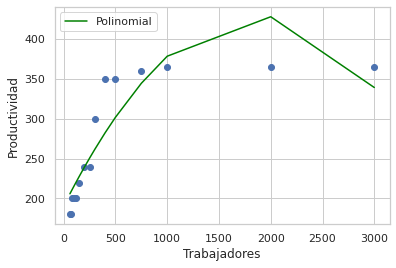

In [63]:
#Graficar
plt.plot(x, y_head2, color="green", label="Polinomial")
plt.legend()
plt.scatter(x=x, y=y)
plt.xlabel("Trabajadores")
plt.ylabel("Productividad")
plt.show()

Mejorar el ajuste aumentando el número del polinomio

In [60]:
#Aumentar a grado 4
polynomial_regression4 = PolynomialFeatures(degree=4)
x_polynomial4 = polynomial_regression4.fit_transform(x,y)

In [61]:
linear_regression = LinearRegression()
linear_regression.fit(x_polynomial4,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_head4 = linear_regression.predict(x_polynomial4)

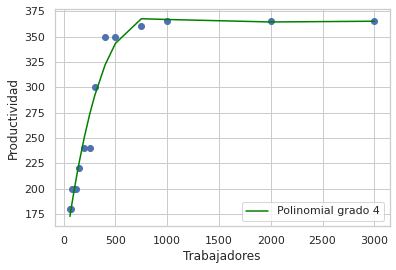

In [64]:
#Graficar
plt.plot(x, y_head4, color="green", label="Polinomial grado 4")
plt.legend()
plt.scatter(x=x, y=y)
plt.xlabel("Trabajadores")
plt.ylabel("Productividad")
plt.show()

**Reto 3**

Datos de salario y posición laboral, donde los que se percibe depende de la posición laboral. Primero, deberá hacer uso de una regresión lineal, y en un segundo paso, hacer uso de una no lineal para poder explicar las ventajas de pensar más allá en términos de una no relación lineal ¡Éxito!

1. Importe el dataset. Para este ejercicio no deberá partir entre dataset de entrenamiento: y prueba
2. Haga una regresión lineal con los datos x e y ajustados.
2.1 Visualice su regresión lineal
3. Desarrolle su modelo de regreisón polinomial (nota: use from sklearn.preprocessing import PolynomialFeatures, despues use PolynomialFeatures con el argumento de degree experimentando distintos grados, para ello puede ir graficando su regreisón estimada, hasta llegar a la que haga mejor ajuste visualmente. Tambien use su_regresion.fit_transform('su variable x'))
4. Visualice su regresión no lineal
5. Genere una predicción con la regresion lineal para la posición laboral 12 con  lin_reg.predict, y ahora genere una con la no lineal 
- (CONSEJO SALVA VIDAS:  se hace con la misma base de la regreison lineal pero agregue .suRegresionNoLineal.fit_transform)
6. BONUS: Visualice su regresión no lineal con una suavización de la recta

In [51]:
df = pd.read_csv("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2004.%20Regresiones/Reto03/Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [52]:
#Librerías
import os

In [53]:
#Procesamiento, reescalar
x = df.Level.values.reshape(-1,1)
y = df.Salary.values.reshape(-1,1)

In [55]:
#Regresión base
polynomial_regression = PolynomialFeatures(degree=1)
x_polynomial = polynomial_regression.fit_transform(x,y)

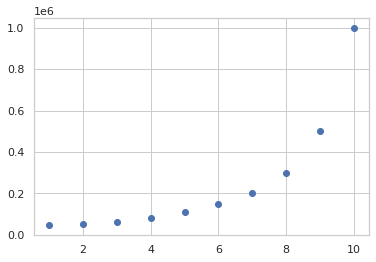

In [56]:
#Graficar
sns.set(style='whitegrid',font_scale=1.0, rc={'figure.figsize':(6,4)})
plt.scatter(x,y);
#Se aprecia a simple vista que no es una relación lineal

In [58]:
linear_regression = LinearRegression()
linear_regression.fit(x_polynomial,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
y_head2 = linear_regression.predict(x_polynomial)

Text(0, 0.5, 'Productividad marginal')

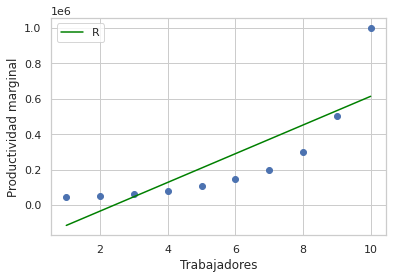

In [60]:
#Graficar
plt.plot(x, y_head2, color='green', label='Polynomial')
plt.legend("Regresión polinomial grado 1")
plt.scatter(x,y)
plt.xlabel('Trabajadores')
plt.ylabel('Productividad marginal');

In [61]:
#Nueva regresión
#Regresión base
polynomial_regression3 = PolynomialFeatures(degree=3)
x_polynomial3 = polynomial_regression3.fit_transform(x,y)

In [62]:
linear_regression = LinearRegression()
linear_regression.fit(x_polynomial3,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_head2 = linear_regression.predict(x_polynomial3)

Text(0, 0.5, 'Productividad marginal')

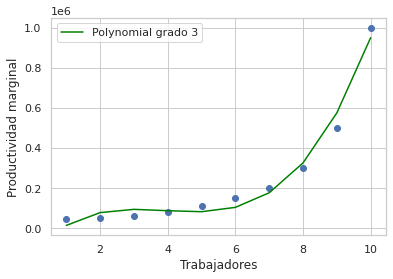

In [72]:
#Nueva gráfica
plt.plot(x, y_head2, color='green', label='Polynomial grado 3')
plt.legend()
plt.scatter(x,y)
plt.xlabel('Trabajadores')
plt.ylabel('Productividad marginal')

**Ejemplo 2**

In [67]:
import mpl_toolkits

In [68]:
#Datasets precios de casas
dataset = pd.read_csv("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2004.%20Regresiones/Ejercicio02/kc_house_data.csv")
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [69]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [70]:
#Variables de interés
price = dataset['price']
space = dataset['sqft_living']

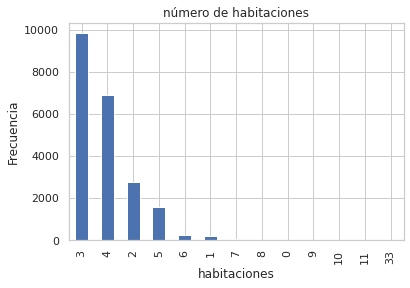

In [74]:
#Barplot
dataset["bedrooms"].value_counts().plot(kind="bar")
plt.title("número de habitaciones")
plt.xlabel("habitaciones")
plt.ylabel("Frecuencia")
sns.despine;

<Figure size 720x720 with 0 Axes>

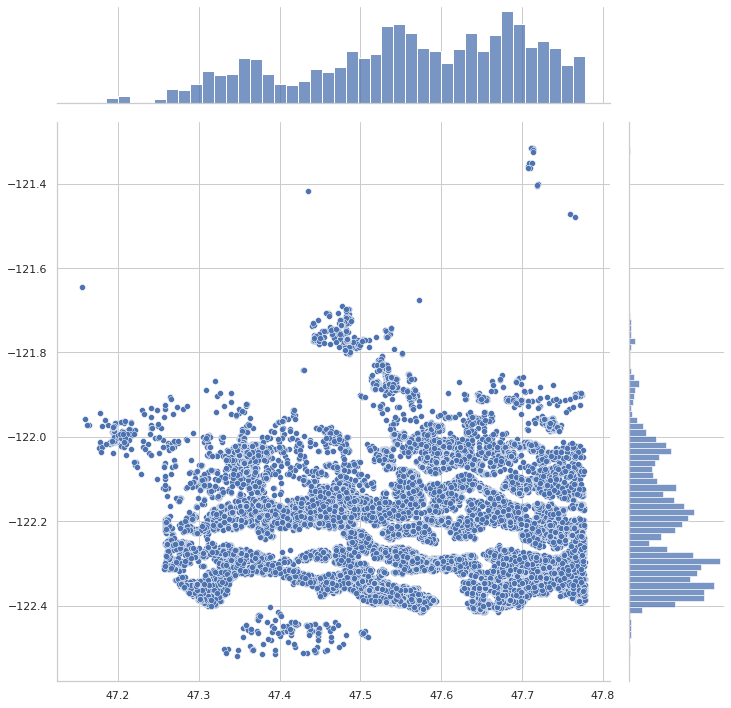

In [74]:
plt.figure(figsize=(10,10))
sns.jointplot(x=dataset.lat.values, y=dataset.long.values, height=10)
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

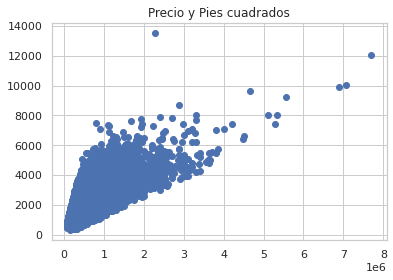

In [76]:
#Pies cuadrados
plt.scatter(dataset.price, dataset.sqft_living)
plt.title("Precio y Pies cuadrados");

In [76]:
#Regresión en bruto
train1 =dataset.drop(['id', 'price', 'date'], axis = 1)
train1.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [78]:
#Modelo
x_train, x_test, y_train, y_test = train_test_split(train1, price, test_size=0.1, random_state = 25)

In [79]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
#R^2
regressor.score(x_test,y_test)

0.6791625453274828